# Linear functions

Let's try to create some logical functions for classification using linear functions!

In [4]:
def logical_and(first_num, second_num):
    if (first_num + second_num >= 2.0):
        return True
    else:
        return False

In [5]:
logical_and(1, 1)

True

In [6]:
logical_and(1, 0)

False

In [7]:
def logical_or(first_num, second_num):
    if (first_num + second_num >= 1.0):
        return True
    else:
        return False

In [8]:
logical_or(1, 1)

True

In [9]:
logical_or(1, 0)

True

In [10]:
logical_or(0, 0)

False

## Vectors

In [7]:
# Let's create vectors of different data

from typing import List

Vector = List[float] # empty vector

height_weight_age = [70, # inches
                    170, # pounds
                    40] # years

grades = [95, # subject 1
         80, # subject 2
         75, # subject 3
         62] # subject 4

### Vector operations

In [14]:
def add_vectors(v: Vector, w: Vector) -> Vector:
    ''' Add correspondent elements - it is like transposing a point in graph '''
    assert len(v) == len(w), "Vectors must be of same length"
    return [v_i + w_i for v_i, w_i in zip(v, w)]

add_vectors([1, 2, 3], [4, 5, 6])


[5, 7, 9]

In [16]:
def subtract_vectors(v: Vector, w: Vector) -> Vector:
    ''' Add correspondent elements - it is like transposing a point in graph '''
    assert len(v) == len(w), "Vectors must be of same length"
    return [v_i - w_i for v_i, w_i in zip(v, w)]

subtract_vectors([9, 7, 1], [4, 5, 6])

[5, 2, -5]

In [18]:
def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""

    # Check that vectors is not empty
    assert vectors, "no vectors provided!"

    # Check the vectors are all the same size
    num_elements = len(vectors[0])

    assert all(len(v) == num_elements for v in vectors), "different sizes!"

    # the i-th element of the result is the sum of every vector[i]

    return [sum(vector[i] for vector in vectors)
        for i in range(num_elements)]

vector_sum([[1, 2], [3, 4], [5, 6], [7, 8]])


[16, 20]

In [19]:
def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

scalar_multiply(2, [1, 2, 3])

[2, 4, 6]

In [20]:
def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

vector_mean([[1, 2], [3, 4], [5, 6]])

[3.0, 4.0]

In [23]:
def dot_product(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""    
    assert len(v) == len(w), "vectors must be same length"
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

dot_product([1, 2, 3], [4, 5, 6])

32

In [25]:
# Other useful functions can be created re-using the vector functions
def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot_product(v, v)

sum_of_squares([1, 2, 3])

14

In [26]:
import math

def magnitude(v: Vector) -> float:
    """Returns the magnitude (or length) of v"""
    return math.sqrt(sum_of_squares(v)) # math.sqrt is square root function

magnitude([3, 4])

5.0

In [28]:
def squared_distance(v: Vector, w: Vector) -> float:
    """Computes (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(subtract_vectors(v, w))

def distance(v: Vector, w: Vector) -> float:
    """Computes the distance between v and w"""
    return math.sqrt(squared_distance(v, w))

distance([3, 4], [7, 5])

4.123105625617661

### Plotting vectors

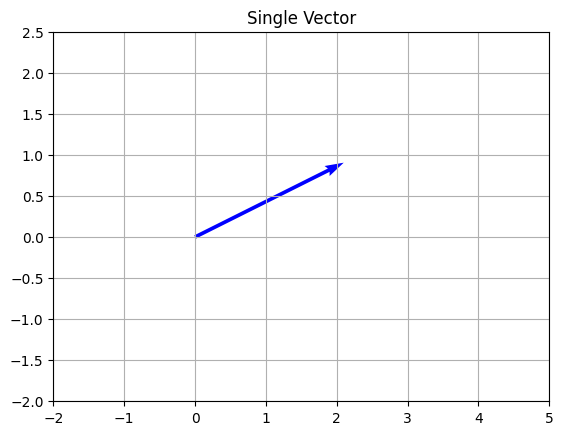

In [1]:
import numpy as np
import matplotlib.pyplot as plt
  
# Vector origin location
X = [0]
Y = [0]
  
# Directional vectors
U = [2]  
V = [1]  
  
# Creating plot
plt.quiver(X, Y, U, V, color='b', units='xy', scale=1)
plt.title('Single Vector')
  
# x-lim and y-lim
plt.xlim(-2, 5)
plt.ylim(-2, 2.5)
  
# Show plot with grid
plt.grid()
plt.show()

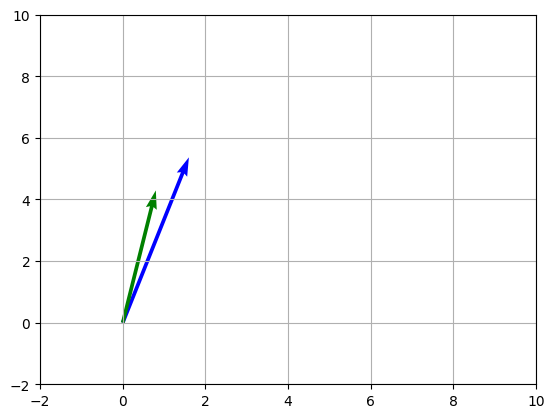

In [40]:
import numpy as np
import matplotlib.pyplot as plt

coordinates = np.array([[2, 5], [1, 4]])
origin = np.array([[0, 0], [0, 0]])

plt.quiver(*origin, coordinates[:, 0], coordinates[:, 1], color=['blue','green'], scale=15)

plt.ylim(-2,10)
plt.xlim(-2,10)

plt.grid()
plt.show()

## Matrices

Two dimensional data structures. Represented by list of lists.

In [4]:
from typing import List

Matrix = List[List[float]]

a = [[1, 2, 3],
     [4, 5, 6]]


### Matrix operations

In [6]:
from typing import Tuple

def shape(A: Matrix) -> Tuple[int, int]:
    '''Return no. of rows and columns'''
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

shape([[1, 2, 3], [4, 5, 6]])



(2, 3)

In [12]:
def get_row(A: Matrix, i:int) -> Vector:
    '''Returns the i-th row of A'''    
    return A[i] # A[i] is already the ith row

def get_column(A: Matrix, j: int) -> Vector:
    """Returns the j-th column of A (as a Vector)"""
    return [A_i[j] # jth element of row A_i
        for A_i in A] # for each row A_i

get_row([[1, 2, 3], [4, 5, 6]], 0)
get_column([[1, 2, 3], [4, 5, 6]], 1)

[2, 5]

In [13]:
from typing import Callable

def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
    """
    Returns a num_rows x num_cols matrix
    whose (i,j)-th entry is entry_fn(i, j)
    """
    return [[entry_fn(i, j) # given i, create a list
        for j in range(num_cols)] # [entry_fn(i, 0), ... ]
        for i in range(num_rows)] # create one list for each i

In [14]:
def identity_matrix(n: int) -> Matrix:
    """Returns the n x n identity matrix"""
    return make_matrix(n, n, lambda i, j: 1 if i == j else 0)

In [15]:
identity_matrix(5)

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [16]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [20]:
# alternate representation
# user 0 1 2 3 4 5 6 7 8 9
#
friend_matrix = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # user 0
                 [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # user 1
                 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], # user 2
                 [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # user 3
                 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # user 4
                 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # user 5
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 6
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 7
                 [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # user 8
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] # user 9


assert friend_matrix[0][8] == 0, "0 and 8 are not friends"

In [21]:
assert friend_matrix[0][2] == 1, "0 and 2 are friends"

In [24]:
assert friend_matrix[0][8] == 0, "0 and 8 are not friends"